## An analysis of the descriptions for each item on the menu for a particular restaurant on Zomato

### Author : George M Cherian

In [1]:
# Importing the requisite modules for scraping the data from Zomato
from bs4 import BeautifulSoup
import requests
import json
import re

In [2]:
# Enter the url of the restaurant here....
zom_url = 'https://www.zomato.com/bangalore/voosh-thalis-bowls-1-bellandur-bangalore/order'

In [3]:
urlheader = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

In [4]:
response = requests.get(zom_url,headers=urlheader)

In [5]:
# Checking if we got a successful response
response.status_code

200

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')

In [7]:
cnt = 0

In [8]:
# isolating both the scripts pertaining to the restaurant's menu
for script in soup(text=re.compile(r'Menu' )):
    if cnt == 0:
        a = script.parent
        cnt+=1
    if cnt == 1:
        B = script.parent
    

In [9]:
# jsonifying the first script
data = json.loads(''.join(a.contents))
name = list()
description = list()
price = list()

In [10]:
# extracting price and description
for item in data['hasMenuSection']:
    b = item['hasMenuSection']
    c = b[0]['hasMenuItem']
    for x in c:
        name.append(x['name'])
        description.append(x['description'])
        #price.append(x['offers']['price'])


In [11]:
# Importing pandas for data manipulation
import pandas as pd

In [12]:
df = pd.DataFrame()

In [13]:
df['Name'] = name
df['Description'] = description

In [14]:
df = df.drop_duplicates()

In [15]:
g = B.contents
g = ''.join(g)

In [16]:
# Finding the price of each item from the script
for dish in df['Description']:
    ind1 = g.find(dish)
    ind2 = g[ind1:].find(',\\"variant_id\\"')
    temp = g[ind1:]
    p = temp[ind2-3:ind2]
    if p[0] == ':':
        p = p[1:3]
        
    price.append(int(p))
    
    

In [17]:
df['Price'] = price

#### Output DataFrame containing the name of the dish, it's description and price

In [18]:
pd.set_option("display.max_colwidth",100)
df.style.set_properties(**{'text-align':'left'}).set_table_styles([dict(selector='th', props=[('text-align','center')])])

,Name,Description,Price
0,"Voosh Paneer Premium Thali with Sweet, Butter Milk","Enjoy a wholesome thali meal with paneer masala, dry veggie of the day, dal tadka, 2 phulkas, rice, sweet, butter milk. Amazing for one.",209
1,"2 Gobhi Paratha, Curd & Pickle Meal","2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.",134
2,Aloo Gobhi,A dry north Indian sabzi with aloo gobhi tossed in basic Indian spices with a splash of fresh aromatic coriander. Serves 1 with full satisfaction.,126
3,Homely Bhindi Masala Thali with Sweet,"Enjoy a delicious meal with bhindi masala, dal tadka, 2 phulkas, rice and sweet. Amazing for one.",144
4,Homely Paneer Masala Thali with Sweet,"Enjoy a delicious meal with paneer masala, dal tadka, 2 phulkas, rice and sweet. Amazing for one.",144
5,"2 Paneer Paratha, Curd & Pickle Meal","2 paneer parathas, curd, sweet, salad and pickle. Amazing for one.",144
6,Set of Chapatis (4 - Chapatis),"Wheat chapattis - soft, fluffy and cooked to perfection.",79
7,Voosh Variety Thali with a Sweet & Butter Milk,"Treat yourself with delicious bhindi Masala, aloo gobhi, dal tadka, 2 phulka, rice ,sweet, butter milk. Amazing for one.",199
8,Homely Dal Tadka Thali with Sweet,"Enjoy a delicious meal with dal tadka, dry veggie of the day, 2 phulkas, rice, raita and sweet. Amazing for one.",144
9,Homely Aloo Gobhi Thali with Sweet,"Enjoy a delicious meal with aloo gobhi, dal tadka, 2 phulkas, rice, sweet. Amazing for one.",144


In [19]:
# Cleaning the description
desc = list()
for d in df['Description']:
    final = []
    for char in d:
        if char.isalnum() or char.isspace():
            final.append(char)
        else:
            final.append(' ')
            
    final = ''.join(final)
    desc.append(final.lower())

In [20]:
# nltk is imported to use stopwords
import nltk
from nltk.corpus import stopwords

In [21]:
!pip install inflect --upgrade --quiet

In [22]:
import inflect

In [23]:
p = inflect.engine()

In [24]:
#nltk.download('stopwords')

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
words = list()

for d in desc:
    temp = list(d.split())
    words.append(temp)
    



In [27]:
d = dict() # Dictionary to store each unique word as well as the number of occurrences

for word_group in words :
    for word in word_group:
        
        if word.isnumeric():
            word = p.number_to_words(word)
            
        if len(word) == 1:
            continue
# Only words that are not in stopwords is added to the dictionary.
# Stopwords(a,an,the,for..etc) are ignored as they do not affect the overall meaning.
        if word not in stop_words:
            if word in d:
                d[word] += 1
            else:
                d[word]=1

In [28]:
# Sorting on the basis of frequency
d = dict(sorted(d.items(), key=lambda item: item[1],reverse=True))

In [29]:
word_df = pd.DataFrame(list(d.items()),columns=['word','count'])

In [30]:
pd.set_option("display.max_colwidth",100)
op = word_df.style.set_properties(**{'text-align':'left'}).set_table_styles([dict(selector='th', props=[('text-align','left')])])

#### DataFrame shwowing each word with it's frequency

In [31]:
op

,word,count
0,one,17
1,amazing,13
2,two,12
3,sweet,11
4,rice,10
5,dal,9
6,tadka,9
7,meal,8
8,paneer,8
9,masala,8


In [32]:
top_20 = word_df.head(20)

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Identifying the top 20 words with the highest frequncies...

In [34]:
top_20

,word,count
0,one,17
1,amazing,13
2,two,12
3,sweet,11
4,rice,10
5,dal,9
6,tadka,9
7,meal,8
8,paneer,8
9,masala,8


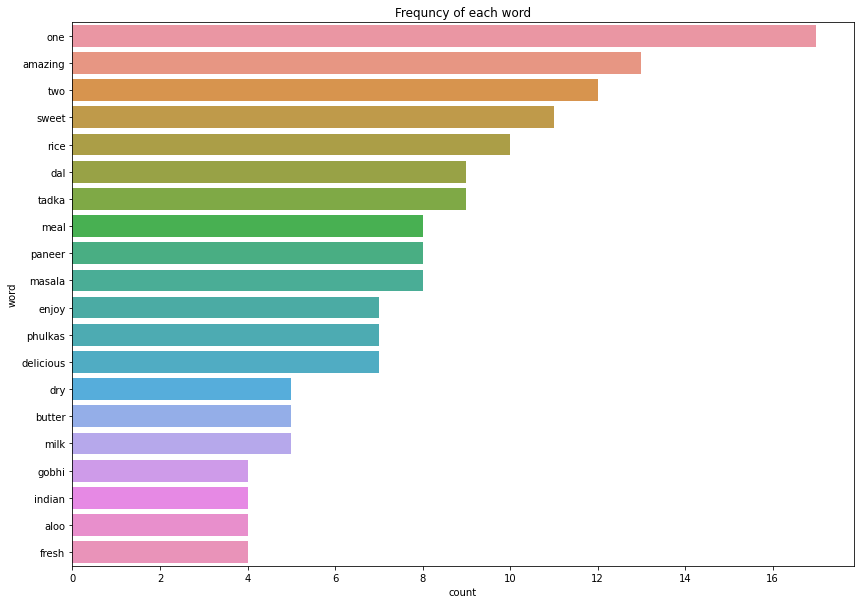

In [35]:
plt.figure(figsize=(14,10))
plot = sns.barplot(x='count',y='word',data=top_20)
plot.set_title('Frequncy of each word')
plt.show(plot)

In [36]:
path = r'<----Enter Path Here ---->'
word_df.to_csv(path,index=False)